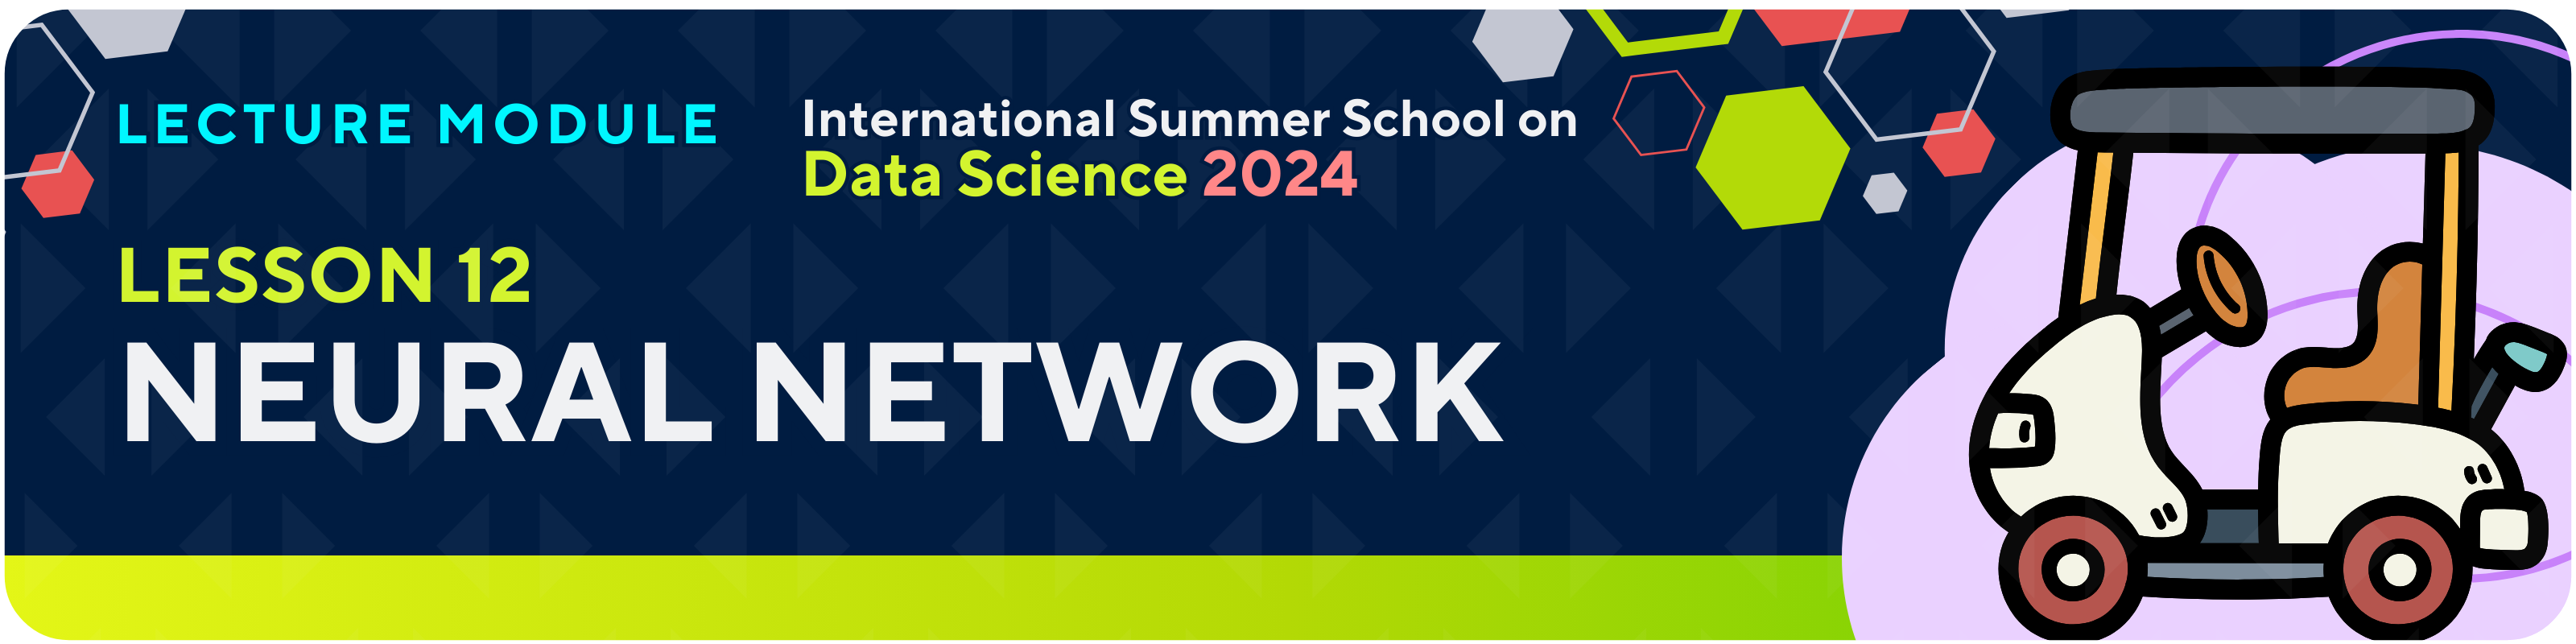

< ! > The codes in this module require GPU to run smoothly.

**How to Enable GPU Acceleration:**
* In main navigation of Google Colab above, go to 'Runtime' > 'Change runtime'
* Under 'Hardware accelerator', select 'T4 GPU'

<div class='markdown-google-sans'>

## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Intro To Neural Network**
</div>
<img src="https://i.imgur.com/2GjFCjs.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Advantage of Neural Network**
</div>
<img src="https://i.imgur.com/BDiT0YX.png" width=700 />

<img src="https://i.imgur.com/h0eTVvf.png" width=700 />

<img src="https://i.imgur.com/DF74GLP.png" width=700 />

<img src="https://i.imgur.com/4FkwhT3.png" width=700 />

<img src="https://i.imgur.com/ljiR3Xw.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Elements of a Neural Network**
</div>
<img src="https://i.imgur.com/WZBKel8.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Deep Learning Tools in Python**
</div>
<img src="https://i.imgur.com/RWYN91Y.png" width=700 />



<img src="https://i.imgur.com/9cqPNbZ.png" width=700 />



<img src="https://i.imgur.com/fntIouH.png" width=700 />



<img src="https://i.imgur.com/o7Fic8k.png" width=700 />


<div class='markdown-google-sans'>

## **12A.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Multilayer Perceptron**
</div>


<div class='markdown-google-sans'>

### **<font color=#819A00> About MLP**
</div>
<img src="https://i.imgur.com/NAg1Z9j.png" width=700 />


<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>



In [ ]:
from sklearn.model_selection import train_test_split

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/mf7aqm0760c30x0igtve4/golf_dataset_mini_original_with_testset.csv?rlkey=ernxxd4k17itox3x9e7ydgyii&dl=0&raw=1"
df = pd.read_csv(dataset_url).drop(columns=["overcast"])

X, y = df.drop(['Play'], axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)


<div class='markdown-google-sans'>

### **<font color=#819A00> Main Mechanism**
</div>
<img src="https://i.imgur.com/yHqBZm9.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>

<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>
<img src="https://i.imgur.com/331MKwm.png" width=700 />

<img src="https://i.imgur.com/2oxFTGF.png" width=700 />


In [ ]:
from sklearn.preprocessing import StandardScaler

# ① Preprocessing
numerical_cols = X_train.select_dtypes(include=['float64']).columns

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Fit and Transform the Data
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print(X_train_transformed)
print(X_test_transformed)

[[ 1.80471534  0.49715486  1.          0.          0.        ]
 [ 1.01515238  1.02444033  1.          0.          1.        ]
 [ 1.48889015 -0.24104478  0.          0.          0.        ]
 [-0.56397354  1.65718288  0.          1.          0.        ]
 [-0.87979873 -0.0301306   0.          1.          0.        ]
 [-1.3535365  -1.08470152  0.          1.          1.        ]
 [-1.5114491  -1.61198699  0.          0.          1.        ]
 [-0.24814836  1.55172579  1.          0.          0.        ]
 [-0.72188614 -1.08470152  1.          0.          0.        ]
 [ 0.22558942 -0.0301306   0.          1.          0.        ]
 [ 0.22558942 -1.08470152  1.          0.          1.        ]
 [-0.24814836  1.02444033  0.          0.          1.        ]
 [ 1.17306497 -0.55741606  0.          0.          0.        ]
 [-0.40606095 -0.0301306   0.          1.          1.        ]]
[[ 1.17306497  0.81352614  1.          0.          1.        ]
 [ 0.06767683  1.23535451  0.          0.          0. 

<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/sS45bXb.png" width=700 />

<img src="https://i.imgur.com/rPLlLAE.png" width=700 />

<img src="https://i.imgur.com/HzcNiLD.png" width=700 />

<img src="https://i.imgur.com/8lyc4cH.png" width=700 />

<img src="https://i.imgur.com/CyXQfs8.png" width=700 />

<img src="https://i.imgur.com/2jPB0rj.png" width=700 />

<img src="https://i.imgur.com/uGt8hp7.png" width=700 />

<img src="https://i.imgur.com/qxVChd3.png" width=700 />

<img src="https://i.imgur.com/D01x8h3.png" width=700 />

<img src="https://i.imgur.com/JLwsGuc.png" width=700 />

<img src="https://i.imgur.com/Hp7bQU3.png" width=700 />

<img src="https://i.imgur.com/6eMpIew.png" width=700 />

<img src="https://i.imgur.com/fFGnY9O.png" width=700 />

<img src="https://i.imgur.com/OULKba8.png" width=700 />



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

import random
import numpy as np

# Set Random Seed
tf.random.set_seed(40)
np.random.seed(40)
random.seed(40)

def create_model():
    model = Sequential([
        Dense(5, activation='relu', input_dim=X_train_transformed.shape[1], name='Hidden_Layer_1'),
        Dense(3, activation='relu', name='Hidden_Layer_2'),
        Dense(1, activation='sigmoid', name='Output_Layer')
    ])
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and Train the Model
model = create_model()
model.fit(X_train_transformed, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 12ms/step - loss: 0.2068 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: -0.3377 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: -0.7388 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: -1.1289 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: -1.4908 - accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: -1.8302 - accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: -2.1897 - accuracy: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: -2.5543 - accuracy: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: -2.9570 - accuracy: 0.0000e+00
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: -3.3638 

In [ ]:
# Get final weights for all layers
for layer in model.layers:
    weights, biases = layer.get_weights()
    print(f"Weights for {layer.name}:")

    # Loop through each node in the layer
    for i, (weight, bias) in enumerate(zip(weights.T, biases)):
        print(f"  Node {i + 1}:")
        print(f"    Weights: {weight.round(3)}  Bias: {bias:.3f}")
    print()

Weights for Hidden_Layer_1:
  Node 1:
    Weights: [-0.192  0.11  -0.214  0.336 -0.195  0.068 -0.005 -0.141 -0.182 -0.153
 -0.208 -0.493]  Bias: -0.136
  Node 2:
    Weights: [-0.445  0.248  0.289  0.09  -0.036  0.297 -0.441 -0.598 -0.419 -0.587
 -0.496  0.033]  Bias: -0.253
  Node 3:
    Weights: [-0.303 -0.362  0.279 -0.184 -0.309  0.351  0.49  -0.429 -0.265 -0.617
 -0.089 -0.163]  Bias: -0.364
  Node 4:
    Weights: [ 0.897  0.263 -0.47  -0.908 -0.815 -0.302 -0.089 -0.408  0.87   0.227
 -0.08   0.547]  Bias: 0.430
  Node 5:
    Weights: [ 0.027  0.611  0.789 -0.267 -0.124  0.893  0.192  0.661  0.702 -0.134
  0.093 -0.095]  Bias: 0.426

Weights for Hidden_Layer_2:
  Node 1:
    Weights: [-0.448 -0.514 -0.351  0.635  0.253]  Bias: 0.422
  Node 2:
    Weights: [ 0.02   0.508 -0.608 -0.559 -0.533]  Bias: -0.058
  Node 3:
    Weights: [-0.291 -0.064  0.946  0.967  0.8  ]  Bias: 0.407

Weights for Output_Layer:
  Node 1:
    Weights: [ 1.58  -0.163  0.399]  Bias: 0.408



<div class='markdown-google-sans'>

#### **Classification Phase**
</div>
<img src="https://i.imgur.com/DL8qxHV.png" width=700 />

<img src="https://i.imgur.com/fhea1VL.png" width=700 />


In [ ]:
y_pred = (model.predict(X_test_transformed).flatten() > 0.5).astype("int")
print("Label     :", list(y_test))
print("Prediction:", list(y_pred))

1/1 [==============================] - 0s 77ms/step
Label     : [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]
Prediction: [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/BUlaMZa.png" width=700 />


In [ ]:
test_scores = accuracy_score(y_test, y_pred)
print(f"Accuracy (from X_test): {test_scores:.4f}")

Accuracy (from X_test): 0.7143


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Parameters**
</div>
<img src="https://i.imgur.com/Uu1eDsj.png" width=700 />

<img src="https://i.imgur.com/iimrP3W.png" width=700 />

<img src="https://i.imgur.com/BwgxUPo.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Pros and Cons**
</div>
<img src="https://i.imgur.com/JZ8treK.png" width=700 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　MLP for Classification Simplifed**
</div>

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
X, y = df.drop(['Play'], axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('scaler', PowerTransformer(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# Fit and Transform the Data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Model Definition
def create_model():
    model = Sequential([
        Dense(16, activation='relu', input_dim=X_train_transformed.shape[1]),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and Train the Model
model = create_model()
model.fit(X_train_transformed, y_train, epochs=100)

# Evaluate on Test Set
y_pred = (model.predict(X_test_transformed) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Epoch 1/100
4/4 [==============================] - 1s 8ms/step - loss: 0.5999 - accuracy: 0.6500
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5757 - accuracy: 0.6667
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5606 - accuracy: 0.6750
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5479 - accuracy: 0.6917
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5378 - accuracy: 0.7250
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5283 - accuracy: 0.7333
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5186 - accuracy: 0.7583
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5102 - accuracy: 0.7583
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5010 - accuracy: 0.7833
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4924 - accuracy: 0.7917
Epoch 11/100
4/4 [===========

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　MLP for Regression Simplifed**
</div>

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
X, y = df.drop(['Play','NumPlayers'], axis=1), df['NumPlayers']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('scaler', PowerTransformer(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# Fit and Transform the Data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Model Definition
def create_model():
    model = Sequential([
        Dense(32, activation='relu', input_dim=X_train_transformed.shape[1]),
        Dense(16, activation='relu'),
        Dense(1)  # Linear activation for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and Train the Model
model = create_model()
model.fit(X_train_transformed, y_train, epochs=50)

# Evaluate on Test Set
y_pred = model.predict(X_test_transformed).flatten()
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

print(f"RMSE (from X_test): {test_rmse:.3f}")
print(f"R2 Score (from X_test): {test_r2:.3f}")


Epoch 1/50
4/4 [==============================] - 1s 7ms/step - loss: 692.0501
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 684.5892
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 677.4887
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 670.3419
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 663.2064
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 655.8915
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 648.4886
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 640.6415
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 632.6532
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 624.4046
Epoch 11/50
4/4 [==============================] - 0s 5ms/step - loss: 615.6991
Epoch 12/50
4/4 [==============================] - 0s 7ms/step - loss: 606.4465
Epoch 13/50
4/4 [==============================] 

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 12A-1**
</div>
Using the following dataset, perform classification using MLP. Print out the accuracy score.

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# Data Preparation
practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
df = pd.read_csv(practice_dataset_url)
X, y = df.drop(['Play'], axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('scaler', PowerTransformer(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# Fit and Transform the Data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Model Definition
def create_model():
    model = Sequential([
        Dense(16, activation='relu', input_dim=X_train_transformed.shape[1]),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and Train the Model
model = create_model()
model.fit(X_train_transformed, y_train, epochs=50)

# Evaluate on Test Set
y_pred = (model.predict(X_test_transformed) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {test_accuracy:.3f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7018
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5556 - loss: 0.6828
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.6111 - loss: 0.6696
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6111 - loss: 0.6575
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.6667 - loss: 0.6467
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.6667 - loss: 0.6372
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.6667 - loss: 0.6281
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6667 - loss: 0.6199
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7222 - loss: 0.6123
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.7222 - loss: 0.6054
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.7222 - loss: 0.5987
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7778 - loss: 0

<div class='markdown-google-sans'>

## **12A.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Classification Of Unstructured Data**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Unstructured Data**
</div>
<img src="https://i.imgur.com/jV2ZMh0.png" width=700 />

<img src="https://i.imgur.com/nBuDXv9.png" width=700 />

<img src="https://i.imgur.com/yi4w0RQ.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Classification of Images**
</div>



<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>

<img src="https://i.imgur.com/qRGsS0r.png" width=700 />

<img src="https://i.imgur.com/z5fc6LZ.png" width=700 />

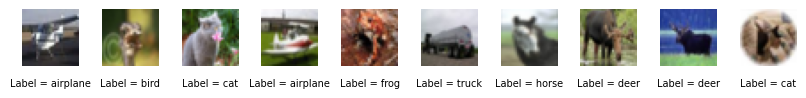

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

# Mapping CIFAR-10 labels to names
cifar10_labels = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

# Visualization
n_to_show = 10
indices = np.random.choice(len(x_train), n_to_show, replace=False)
fig = plt.figure(figsize=(10, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_train[idx]
    label_idx = y_train[idx][0]  # Access the label index
    label_name = cifar10_labels[label_idx]  # Get label name from dictionary
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, f'Label = {label_name}', fontsize=7, ha='center', transform=ax.transAxes)
    ax.imshow(img)

plt.show()


<div class='markdown-google-sans'>

### **<font color=#819A00> Algorithm Steps**
</div>
<img src="https://i.imgur.com/Y3cQChC.png" width=700 />


<div class='markdown-google-sans'>

#### **Preparation Phase**
</div>
<img src="https://i.imgur.com/FB7FHgm.png" width=700 />

<img src="https://i.imgur.com/6Dcx2gZ.png" width=700 />


In [ ]:
from keras.utils import to_categorical

x_train = x_train.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes)
x_test = x_test.astype('float32') / 255.0
y_test = to_categorical(y_test, num_classes)

<div class='markdown-google-sans'>

#### **Training Phase**
</div>
<img src="https://i.imgur.com/HAf004o.png" width=700 />

<img src="https://i.imgur.com/6R1htMP.png" width=700 />

<img src="https://i.imgur.com/0Mpas1N.png" width=700 />

<img src="https://i.imgur.com/7RqrCeA.png" width=700 />

<img src="https://i.imgur.com/7RqrCeA.png" width=700 />

<img src="https://i.imgur.com/Emf00BP.png" width=700 />

<img src="https://i.imgur.com/jtmoS1x.png" width=700 />

<img src="https://i.imgur.com/3UnZvPP.png" width=700 />

<img src="https://i.imgur.com/jihf9ft.png" width=700 />

<img src="https://i.imgur.com/8GPAlts.png" width=700 />

<img src="https://i.imgur.com/J8sFn5S.png" width=700 />

<img src="https://i.imgur.com/W6xi3YA.png" width=700 />



In [ ]:
from keras.layers import Input, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam

# Model Definition
def create_model():
    model = Sequential([
        Input(shape=(32, 32, 3)),
        Flatten(),
        Dense(200, activation='relu'),
        Dense(150, activation='relu'),
        Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Making the Model
model = create_model()

# Training the model on the entire training data
history = model.fit(x_train, y_train,
                    epochs=10, batch_size=64,
                    verbose=1, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 10s 15ms/step - loss: 1.9039 - accuracy: 0.3115 - val_loss: 1.8452 - val_accuracy: 0.3383
Epoch 2/10
625/625 [==============================] - 9s 15ms/step - loss: 1.7152 - accuracy: 0.3845 - val_loss: 1.7034 - val_accuracy: 0.3934
Epoch 3/10
625/625 [==============================] - 10s 15ms/step - loss: 1.6487 - accuracy: 0.4103 - val_loss: 1.6723 - val_accuracy: 0.4054
Epoch 4/10
625/625 [==============================] - 9s 15ms/step - loss: 1.5944 - accuracy: 0.4279 - val_loss: 1.5915 - val_accuracy: 0.4362
Epoch 5/10
625/625 [==============================] - 8s 13ms/step - loss: 1.5568 - accuracy: 0.4426 - val_loss: 1.5884 - val_accuracy: 0.4326
Epoch 6/10
625/625 [==============================] - 10s 16ms/step - loss: 1.5303 - accuracy: 0.4518 - val_loss: 1.5963 - val_accuracy: 0.4361
Epoch 7/10
625/625 [==============================] - 10s 16ms/step - loss: 1.4965 - accuracy: 0.4635 - val_loss: 1.5676 - val_accuracy: 0.

<div class='markdown-google-sans'>

#### **Classification Phase**
</div>
<img src="https://i.imgur.com/Xc2PqUe.png" width=700 />


In [ ]:
# Testing
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


<div class='markdown-google-sans'>

#### **Evaluation Phase**
</div>
<img src="https://i.imgur.com/OlDnIbr.png" width=700 />


Accuracy (from X_test): 0.461


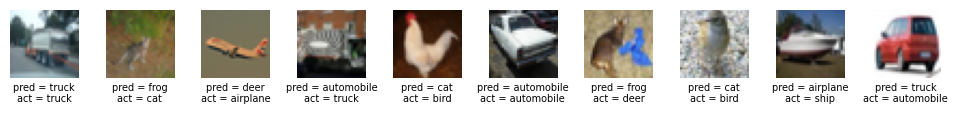

In [ ]:

test_scores = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy (from X_test): {test_scores:.3f}")

# Visualization of predictions and actual labels
n_to_show = 10
indices = np.random.choice(len(x_test), n_to_show, replace=False)
fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    pred_idx = np.argmax(y_pred[idx])
    actual_idx = np.argmax(y_test[idx])

    pred_label = cifar10_labels[pred_idx]
    actual_label = cifar10_labels[actual_idx]

    ax = fig.add_subplot(2, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, f'pred = {pred_label}\nact = {actual_label}', fontsize=7, ha='center', transform=ax.transAxes)
    ax.imshow(img)

plt.show()

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　MLP for Image Classification Simplifed**
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.layers import Input, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Data Preparation
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
x_train = x_train.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes)
x_test = x_test.astype('float32') / 255.0
y_test = to_categorical(y_test, num_classes)

input_dim = (32, 32, 3)

# Model Definition
def create_model():
    model = Sequential([
        Input(shape=input_dim),
        Flatten(),
        Dense(200, activation='relu'),
        Dense(150, activation='relu'),
        Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Making the Model
model = create_model()

# Training the model on the entire training data
history = model.fit(x_train, y_train,
                    epochs=10, batch_size=64,
                    verbose=1, validation_split=0.2)

# Testing
y_pred = model.predict(x_test)
test_scores = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy (from X_test): {test_scores:.3f}")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2789 - loss: 2.0060 - val_accuracy: 0.3745 - val_loss: 1.7670
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3887 - loss: 1.7106 - val_accuracy: 0.3931 - val_loss: 1.7008
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4199 - loss: 1.6246 - val_accuracy: 0.4305 - val_loss: 1.6043
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4406 - loss: 1.5619 - val_accuracy: 0.4443 - val_loss: 1.5744
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4560 - loss: 1.5195 - val_accuracy: 0.4475 - val_loss: 1.5709
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4696 - loss: 1.4896 - val_accuracy: 0.4262 - val_loss: 1.5837
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4809 - loss: 1.4526 - val_accuracy: 0.4456 - val_loss: 1.5503
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4928 - loss: 1.4359 - val_accuracy: 0.

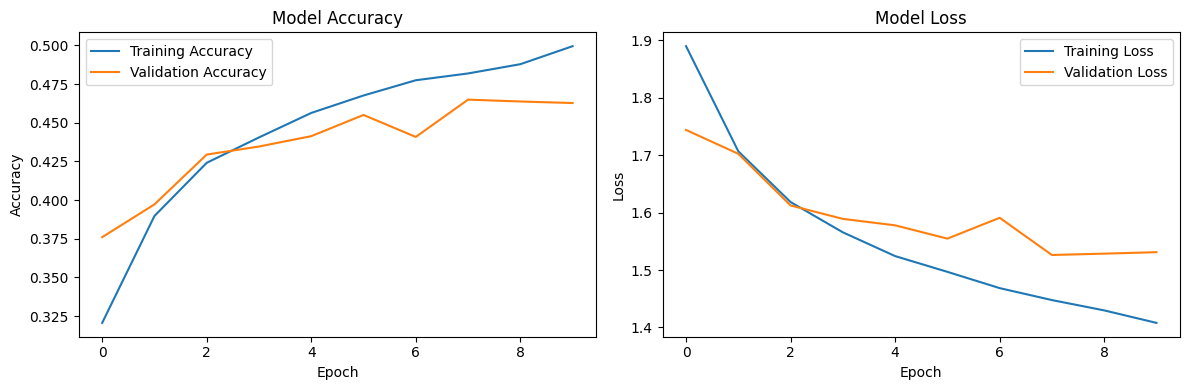

In [ ]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

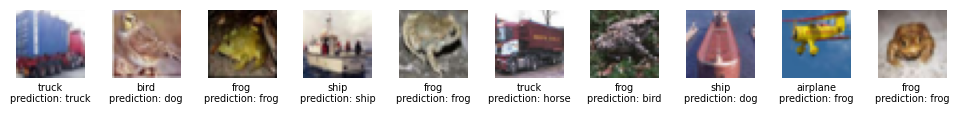

In [ ]:
# Visualization of predictions and actual labels
cifar10_labels = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

n_to_show = 10
indices = np.random.choice(len(x_test), n_to_show, replace=False)
fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    pred_idx = np.argmax(y_pred[idx])
    actual_idx = np.argmax(y_test[idx])

    pred_label = cifar10_labels[pred_idx]
    actual_label = cifar10_labels[actual_idx]

    ax = fig.add_subplot(2, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, f'{actual_label}\nprediction: {pred_label}', fontsize=7, ha='center', transform=ax.transAxes)
    ax.imshow(img)

plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 12A-2**
</div>
MNIST dataset consists of handwritten digits:

Using that MNIST dataset, perform classification using MLP. Print out the accuracy score.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


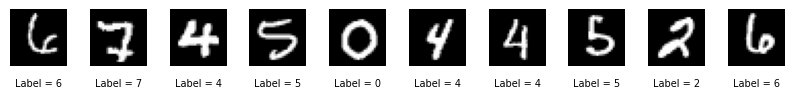

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Data Preparation
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes)
x_test = x_test.astype('float32') / 255.0
y_test = to_categorical(y_test, num_classes)

input_dim = (28, 28, 1)

# Visualization
n_to_show = 10
indices = np.random.choice(range(len(x_train)), n_to_show)
fig = plt.figure(figsize=(10, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_train[idx].reshape(input_dim)
    label = np.argmax(y_train[idx])
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, f'Label = {label}', fontsize=7, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray')  # Display in grayscale

plt.show()

In [ ]:
# Answer
# Model Definition
def create_model():
    model = Sequential([
        Input(shape=input_dim),
        Flatten(),
        Dense(200, activation='relu'),
        Dense(150, activation='relu'),
        Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Making the Model
model = create_model()

# Training the model on the entire training data
history = model.fit(x_train, y_train,
                    epochs=4, batch_size=64,
                    verbose=1, validation_split=0.2)

# Testing
y_pred = model.predict(x_test)
test_scores = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy (from X_test): {test_scores:.3f}")

Epoch 1/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8612 - loss: 0.4774 - val_accuracy: 0.9535 - val_loss: 0.1633
Epoch 2/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9657 - loss: 0.1124 - val_accuracy: 0.9663 - val_loss: 0.1064
Epoch 3/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9787 - loss: 0.0675 - val_accuracy: 0.9726 - val_loss: 0.0946
Epoch 4/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9864 - loss: 0.0463 - val_accuracy: 0.9740 - val_loss: 0.0855
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy (from X_test): 0.974


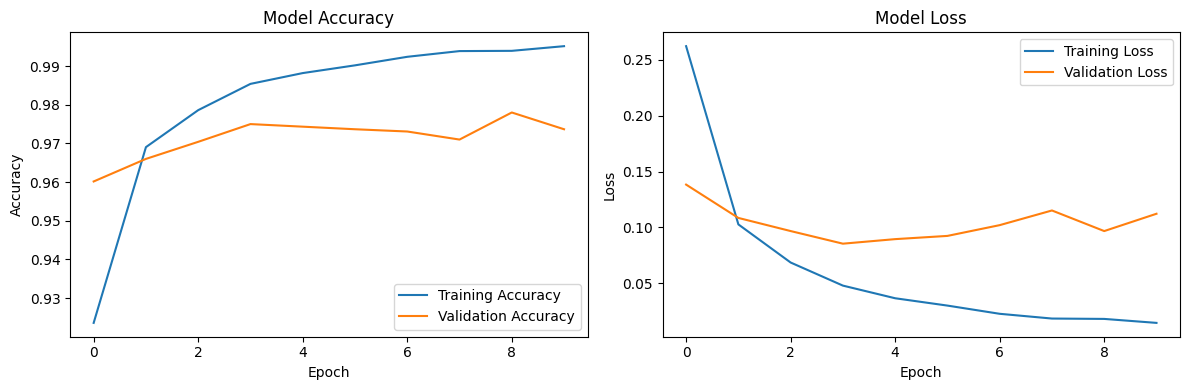

In [ ]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

## **12A.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Types Of Layers In Neural Network**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Layers in Neural Network**
</div>
<img src="https://i.imgur.com/xSHylEu.png" width=700 />

<img src="https://i.imgur.com/FVXGu2i.png" width=700 />

<img src="https://i.imgur.com/ee6s0EK.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Dense Layer**
</div>
<img src="https://i.imgur.com/n0iVNNZ.png" width=700 />

<img src="https://i.imgur.com/6KyqOw7.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Convolutional Layer**
</div>
<img src="https://i.imgur.com/P6mzOrJ.png" width=700 />

<img src="https://i.imgur.com/A765ALO.png" width=700 />

<img src="https://i.imgur.com/0FIxzEw.png" width=700 />

<img src="https://i.imgur.com/9e6PWYn.png" width=700 />

<img src="https://i.imgur.com/Oed7kYn.png" width=700 />

<img src="https://i.imgur.com/004jNuJ.png" width=700 />

<img src="https://i.imgur.com/hGZiH9E.png" width=700 />

<img src="https://i.imgur.com/M1Rg85L.png" width=700 />

<img src="https://i.imgur.com/fHO2gAz.png" width=700 />

<img src="https://i.imgur.com/cBHDdCM.png" width=700 />

<img src="https://i.imgur.com/4182qHA.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Pooling Layer**
</div>
<img src="https://i.imgur.com/W25dirX.png" width=700 />

<img src="https://i.imgur.com/5sfCrVi.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Normalization Layer**
</div>
<img src="https://i.imgur.com/rtul0MP.png" width=700 />

<img src="https://i.imgur.com/PJcTGWl.png" width=700 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Dropout Layer**
</div>
<img src="https://i.imgur.com/JhQiaLF.png" width=700 />

<img src="https://i.imgur.com/w08aTXp.png" width=700 />


<img src="https://i.imgur.com/mIjUWpM.png" width=700 />

<img src="https://i.imgur.com/mMZN4fg.png" width=700 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　CNN for Image Classification Simplifed**
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Dropout, LeakyReLU, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Data Preparation
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
x_train = x_train.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes)
x_test = x_test.astype('float32') / 255.0
y_test = to_categorical(y_test, num_classes)

input_dim =  (32,32,3)

# Model Definition
def create_model():
    model = Sequential([
        # 1st block
        Input(shape=input_dim),
        Conv2D(32, kernel_size=(3, 3), strides=1, padding='same',),
        BatchNormalization(),
        LeakyReLU(),
        # 2nd block
        Conv2D(32, kernel_size=(3, 3), strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(),
        # 3rd block
        Conv2D(64, kernel_size=(3, 3), strides=1, padding='same'),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(pool_size=(2, 2)),
        # 4th block
        Conv2D(64, kernel_size=(3, 3), strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(),
        # Flattening and dense layers
        Flatten(),
        Dense(128),
        BatchNormalization(),
        LeakyReLU(),
        Dropout(0.5),
        # Output layer
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Creating and Training the Model
model = create_model()
history = model.fit(x_train, y_train, epochs=4, batch_size=64, verbose=1, validation_split=0.2)

# Testing
y_pred = model.predict(x_test)
test_scores = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy (from X_test): {test_scores:.3f}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3922 - loss: 1.7802 - val_accuracy: 0.5379 - val_loss: 1.3330
Epoch 2/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6108 - loss: 1.1091 - val_accuracy: 0.6027 - val_loss: 1.1647
Epoch 3/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6604 - loss: 0.9711 - val_accuracy: 0.6203 - val_loss: 1.0934
Epoch 4/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6877 - loss: 0.8844 - val_accuracy: 0.6599 - val_loss: 0.9746
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Accuracy (from X_test): 0.665


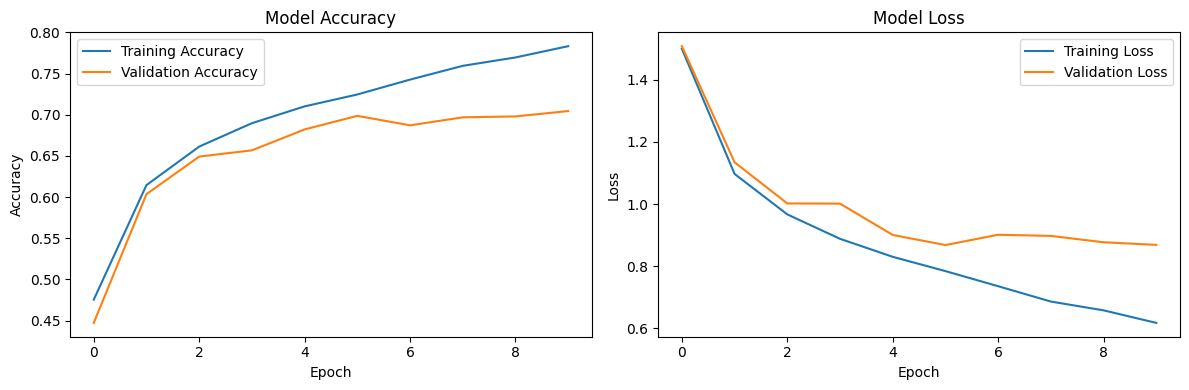

In [ ]:
# Plotting training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 12A-3**
</div>
Using MNIST dataset, perform classification using convolutional neural network. Use all layers types discussed above.

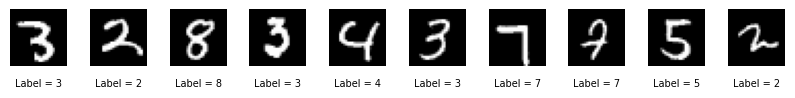

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Data Preparation
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes)
x_test = x_test.astype('float32') / 255.0
y_test = to_categorical(y_test, num_classes)

input_dim = (28, 28, 1)

# Visualization
n_to_show = 10
indices = np.random.choice(range(len(x_train)), n_to_show)
fig = plt.figure(figsize=(10, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_train[idx].reshape(28, 28)
    label = np.argmax(y_train[idx])
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, f'Label = {label}', fontsize=7, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray')  # Display in grayscale

plt.show()

In [ ]:
# Model Definition
from keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Dropout, LeakyReLU, MaxPooling2D

def create_model():
    model = Sequential([
        # 1st block
        Input(shape=input_dim),
        Conv2D(32, kernel_size=(3, 3), strides=1, padding='same',),
        BatchNormalization(),
        LeakyReLU(),
        # 2nd block
        Conv2D(32, kernel_size=(3, 3), strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(),
        # 3rd block
        Conv2D(64, kernel_size=(3, 3), strides=1, padding='same'),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(pool_size=(2, 2)),
        # 4th block
        Conv2D(64, kernel_size=(3, 3), strides=2, padding='same'),
        BatchNormalization(),
        LeakyReLU(),
        # Flattening and dense layers
        Flatten(),
        Dense(128),
        BatchNormalization(),
        LeakyReLU(),
        Dropout(0.5),
        # Output layer
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Creating and Training the Model
model = create_model()
history = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.2)

# Testing
y_pred = model.predict(x_test)
test_scores = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy (from X_test): {test_scores:.3f}")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9025 - loss: 0.3311 - val_accuracy: 0.9789 - val_loss: 0.0698
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9785 - loss: 0.0695 - val_accuracy: 0.9837 - val_loss: 0.0540
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9833 - loss: 0.0528 - val_accuracy: 0.9852 - val_loss: 0.0492
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9869 - loss: 0.0441 - val_accuracy: 0.9852 - val_loss: 0.0451
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9878 - loss: 0.0381 - val_accuracy: 0.9866 - val_loss: 0.0440
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9906 - loss: 0.0294 - val_accuracy: 0.9893 - val_loss: 0.0367
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9872 - val_loss: 0.0407
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9919 - loss: 0.0263 - val_accuracy: 0

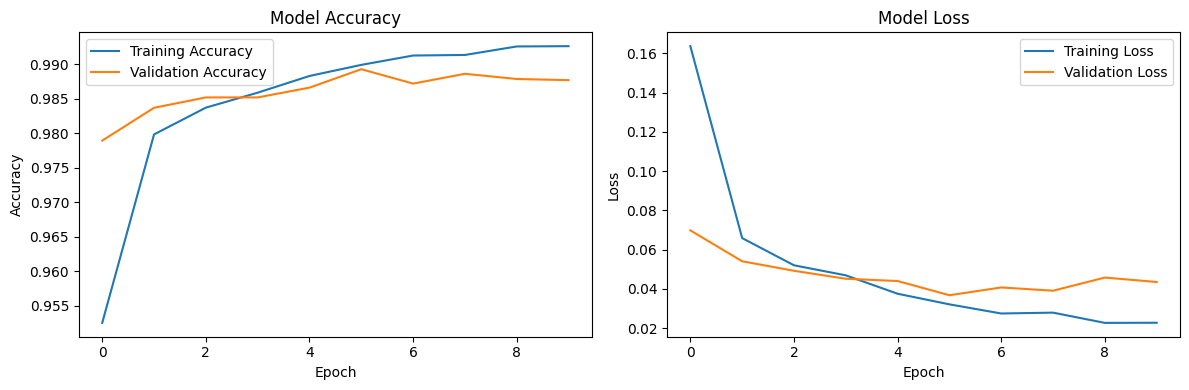

In [ ]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

## **12A.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Types Of Neural Networks**
</div>
<img src="https://i.imgur.com/wRAiiSc.png" width=700 />

<img src="https://i.imgur.com/1eSGPaL.png" width=700 />

<img src="https://i.imgur.com/RQvVUk3.png" width=700 />

<img src="https://i.imgur.com/VvSBiE6.png" width=700 />

<img src="https://i.imgur.com/H5CIeQN.png" width=700 />

<img src="https://i.imgur.com/gnYVuaA.png" width=700 />

<img src="https://i.imgur.com/g7UJlmi.png" width=700 />

<img src="https://i.imgur.com/aMoOm9L.png" width=700 />

<img src="https://i.imgur.com/afN3fFF.png" width=700 />
